![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
from sklearn.linear_model import LinearRegression
import re
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
%matplotlib inline

In [3]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


<Axes: >

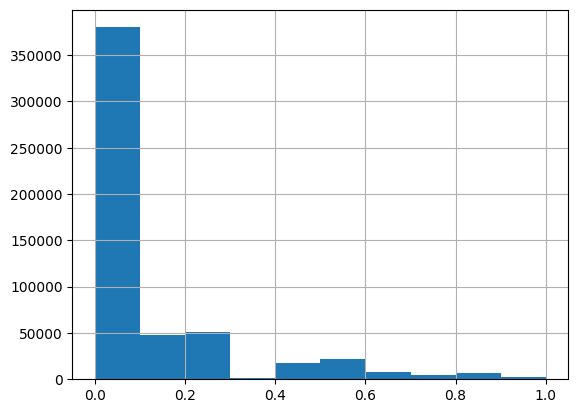

In [4]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [5]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [6]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [7]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [8]:
vect_C = CountVectorizer(lowercase=False,strip_accents=ascii,max_features=10000)
X_dtm_C = vect_C.fit_transform(X_train)

In [9]:
X_dtm_C.shape

(362779, 10000)

In [10]:
y_train.shape

(362779,)

In [11]:
# Visualización de 50 términos en el diccionario de palabras
print(vect_C.get_feature_names_out()[-150:-100])

['will' 'willful' 'willfully' 'willing' 'willingly' 'willingness' 'win'
 'wind' 'window' 'windows' 'winds' 'wine' 'wing' 'wingers' 'wings' 'wink'
 'winner' 'winners' 'winning' 'wins' 'winter' 'wipe' 'wiped' 'wire'
 'wisdom' 'wise' 'wisely' 'wish' 'wished' 'wishes' 'wishing' 'wit' 'witch'
 'with' 'withdraw' 'withdrawal' 'within' 'without' 'witness' 'witnessed'
 'witnesses' 'wives' 'wolf' 'wolves' 'woman' 'womb' 'women' 'won' 'wonder'
 'wondered']


In [ ]:
lrm = LinearRegression()
cv_scores = cross_val_predict(lrm, X_dtm_C, y_train, cv=10)

# Calcula el MSE
mse_train_countVectorizer = mean_squared_error(y_train, cv_scores)
print("Mean Squared Error (MSE):", mse_train_countVectorizer)

In [ ]:
X_dtm_Ctest = vect_C.transform(X_test)

In [ ]:
predictions1 = cross_val_predict(lrm, X_dtm_Ctest, y_test, cv=10)
mse_test_countVectorizer = mean_squared_error(y_test, predictions1)
print("Mean Squared Error (MSE):", mse_test_countVectorizer)

## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 2
vect_2_train = CountVectorizer(lowercase=False,strip_accents=ascii,ngram_range=(1, 3),max_features=10000)#
X_dtm_2train = vect_2_train.fit_transform(X_train)

In [ ]:
lrm2 = LinearRegression()
cv_scores = cross_val_predict(lrm2, X_dtm_2train, y_train, cv=10)
# Calcula el MSE
mse_train_CV_trigramas = mean_squared_error(y_train, cv_scores)
print("Mean Squared Error (MSE):", mse_train_CV_trigramas)

In [ ]:
X_dtm_2test = vect_2_train.transform(X_test)

In [ ]:
predictions2 = cross_val_predict(lrm2 , X_dtm_2test, y_test, cv=10)
mse_test_CV_trigramas = mean_squared_error(y_test, predictions2)
print("Mean Squared Error (MSE):", mse_test_CV_trigramas)

## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

#Celda 3
TfidfVectorizer: es una función basada en la ponderación relativa, a diferencia del CountVectorizer que realiza una contabilización de todo el documento de manera absoluta. así, no se ve afectada por el contexto general.

La sigla TF se refiere a la frecuencia del término, lo que implica que cada termino es medido en función a qué tan frecuente es en el texto dado.

La sigla IDF es la frecuencia inversa, por tanto un IDF bajo implica que el término aparece mucho y un IDF alto implica que no aparece mucho en el texto dado.

Con ello, se calcula automáticamente los valores de TF-IDF para cada término en el corpus de documentos. Transforma una colección de documentos de texto en una matriz donde cada fila representa un documento y cada columna representa un término, con los valores de TF-IDF como las entradas de la matriz.

Dentro de sus ventajas encontramos que este método no solo cuenta la frecuencia de los términos en un documento, sino que también tiene en cuenta que tan importante es considerando el contexto de todos los documentos. Esto ayuda a destacar términos únicos o específicos.

También controla por términos comunes que aparecen en muchos documentos y les da un peso más bajo, lo que ayuda a filtrar palabras irrelevantes.

Es bueno para la clasificación y recuperación de información ya que el TF-IDF es ampliamente utilizado en tareas de clasificación de texto y recuperación de información debido a su capacidad para capturar la relevancia relativa de los términos.

Dentro de sus desventajas se resaltan que el cálculo de IDF puede verse afectado por el tamaño del texto. En textos extremadamente grandes, los términos menos frecuentes pueden tener un IDF muy bajo, lo que puede no ser ideal en algunas aplicaciones. Por lo anterior, documentos de diferentes longitudes pueden tener valores de TF diferentes para los mismos términos, lo que puede afectar la comparación de documentos.

A manera de conclusión, la efectividad depende en gran medida del contexto y de la tarea específica en la que se utilice.

## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 4
tfidf_vectorizer = TfidfVectorizer(sublinear_tf=True,lowercase=False, strip_accents='ascii', max_features=10000)

In [ ]:
X_dtm_4train = tfidf_vectorizer.fit_transform(X_train)

In [ ]:
lrm4 = LinearRegression()
cv_scores = cross_val_predict(lrm4, X_dtm_4train, y_train, cv=10)
# Calcula el MSE
mse_train_TfidfVectorizer = mean_squared_error(y_train, cv_scores)
print("Mean Squared Error (MSE):", mse_train_TfidfVectorizer)

In [ ]:
X_dtm_4test = tfidf_vectorizer.transform(X_test)

In [ ]:
predictions4 = cross_val_predict(lrm4 , X_dtm_4test, y_test, cv=10)
mse_test_TfidfVectorizer = mean_squared_error(y_test, predictions4)
print("Mean Squared Error (MSE):", mse_test_TfidfVectorizer)

In [ ]:
tfidf_vectorizer2 = TfidfVectorizer(sublinear_tf=True,ngram_range=(1, 3),lowercase=False, strip_accents='ascii')

In [ ]:
X_dtm_4_1train = tfidf_vectorizer2.fit_transform(X_train)

In [ ]:
X_dtm_4_1test=tfidf_vectorizer2.transform(X_test)

In [ ]:
lrm4_1 = LinearRegression()
cv_scores = cross_val_predict(lrm4_1, X_dtm_4_1train, y_train, cv=10)
# Calcula el MSE
mse_train_TfidfVectorizer_trigramas = mean_squared_error(y_train, cv_scores)
print("Mean Squared Error (MSE):", mse_train_TfidfVectorizer_trigramas)

In [ ]:
predictions4_5 = cross_val_predict(lrm4_1 , X_dtm_4_1test, y_test, cv=10)
mse_test_TfidfVectorizer_trigramas = mean_squared_error(y_test, predictions4_5)
print("Mean Squared Error (MSE):", mse_test_TfidfVectorizer_trigramas)

## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

In [ ]:
# Celda 5
#En relación al mejor desempeño la función de TfidfVectorizer, la ponderación relativa que realiza es eficiente
#en relación a la función CountVectorizer; el procesamiento hace una tarea de homogenizar los textos dismiuyendo
#la cantidad de palabras disminuyendo la variabilidad, una tarea indispensable y necesaria este tipo de modelizaciones
#que tienen un alto consumo de recursos
mse1 = mse_train_countVectorizer
mse2 = mse_test_countVectorizer
mse3 = mse_train_CV_trigramas
mse4 = mse_test_CV_trigramas
mse5 = mse_train_TfidfVectorizer
mse6 = mse_test_TfidfVectorizer
mse7 = mse_train_TfidfVectorizer_trigramas
mse8 = mse_test_TfidfVectorizer_trigramas
mse_results = [mse1, mse2, mse3, mse4, mse5, mse6]
labels = ['MSE_CV', 'MSE_CV_TEST', 'MSE_CV_TRIGRAMAS', 'MSE_CV_TRIGRAMAS_TEST', 'MSE_TF', 'MSE_TF_TEST', 'MSE_TF_TRIGRAMAS', 'MSE_TF_TRIGRAMAS_TEST']
sns.barplot(x=labels, y=mse_results)

plt.xlabel('Results')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Mean Squared Error (MSE) Results')

plt.show()